<a href="https://colab.research.google.com/github/adetayomathew1/physics-project-Research/blob/main/Reservoir_computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reservoir Computing is a type of recurrent neural network (RNN) where the recurrent part (the "reservoir") is fixed and randomly generated. Only the output connections are trained. This significantly simplifies training compared to traditional RNNs and LSTMs.

In [ ]:
pip install reservoirpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from reservoirpy.nodes import Reservoir
from reservoirpy.nodes import Ridge
from reservoirpy.datasets import lorenz

/usr/local/lib/python3.11/dist-packages/scipy/integrate/_ivp/ivp.py:621: UserWarning: The following arguments have no effect for a chosen solver: `initial_state`, `sampling_rate`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


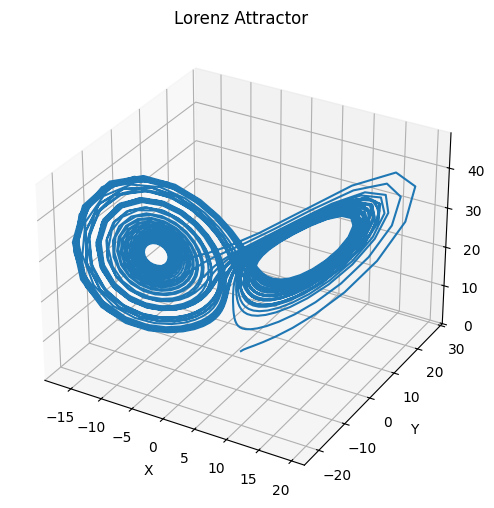

In [ ]:
# Parameters for the Lorenz system
sigma = 10
beta = 8/3
rho = 28
initial_state = [0.1, 0.1, 0.1]
timesteps = 2000  # This variable is now correctly used as n_timesteps
sampling_rate = 0.01

# Generate Lorenz data, passing 'timesteps' as the first positional argument (n_timesteps)
lorenz_data = lorenz(timesteps, sigma=sigma, beta=beta, rho=rho, initial_state=initial_state,
                     sampling_rate=sampling_rate)

# Visualize the Lorenz attractor
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot(lorenz_data[:, 0], lorenz_data[:, 1], lorenz_data[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

In [ ]:
# Split data into training and testing sets
train_data, test_data = train_test_split(lorenz_data, test_size=0.2, shuffle=False)

X_train, y_train = train_data[:-1], train_data[1:]
X_test, y_test = test_data[:-1], test_data[1:]

In [ ]:
lorenz_data


array([[ 1.        ,  1.        ,  1.        ],
       [ 1.1073228 ,  1.79872164,  0.96516196],
       [ 1.40967473,  2.74000007,  0.97272208],
       ...,
       [-0.90872193, -4.36501566, 25.1294829 ],
       [-1.80462639, -4.39279955, 23.37136459],
       [-2.49990581, -4.61186688, 21.85517903]])

Running Model-3:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-3: 601it [00:00, 6001.06it/s]           
Running Model-3: 1599it [00:00, 5560.26it/s]
Running Model-3: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


Fitting node Ridge-3...


'Model-3': Model('Reservoir-3', 'Ridge-3')

In [ ]:
reservoir = Reservoir(units=200, lr=0.2, sr=0.9, input_scaling=0.1)
output = Ridge(ridge=1e-6)
rc_model = reservoir >> output
rc_model.fit(X_train, y_train)  # Ensure this runs before the predict line


Running Model-5:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-5: 368it [00:00, 3675.23it/s]           
Running Model-5: 736it [00:00, 3601.21it/s]
Running Model-5: 1097it [00:00, 3441.90it/s]
Running Model-5: 1599it [00:00, 3650.20it/s]
Running Model-5: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


Fitting node Ridge-5...


'Model-5': Model('Reservoir-5', 'Ridge-5')

In [ ]:
# Instead of using rc_model.predict(X_test), try this:
predictions = rc_model.run(X_test)
# The 'run' method is typi  cally used to obtain predictions in ReservoirPy models

Running Model-5: 399it [00:00, 5579.52it/s]           


Reservoir Computing MSE: 0.05006798708808705


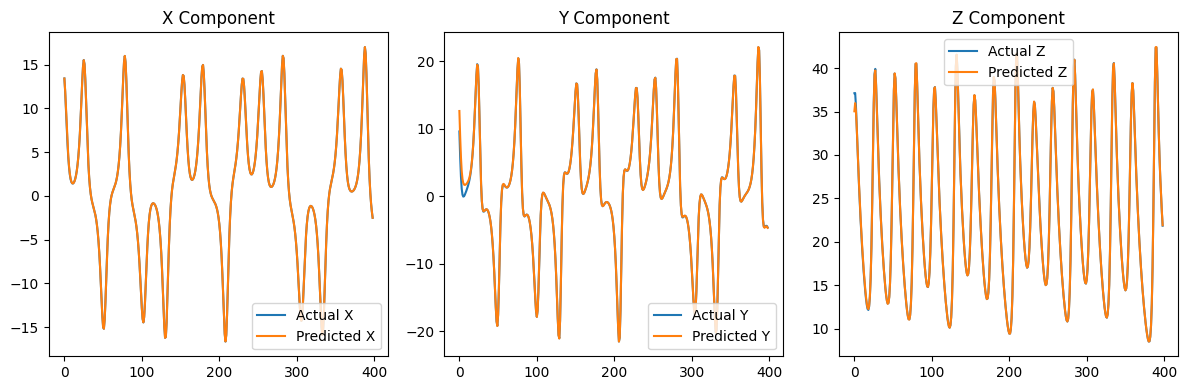

In [ ]:
# Calculate Mean Squared Error
mse_rc = mean_squared_error(y_test, predictions)
print(f"Reservoir Computing MSE: {mse_rc}")

# Visualize the predictions
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(y_test[:, 0], label='Actual X')
plt.plot(predictions[:, 0], label='Predicted X')
plt.legend()
plt.title('X Component')

plt.subplot(1, 3, 2)
plt.plot(y_test[:, 1], label='Actual Y')
plt.plot(predictions[:, 1], label='Predicted Y')
plt.legend()
plt.title('Y Component')

plt.subplot(1, 3, 3)
plt.plot(y_test[:, 2], label='Actual Z')
plt.plot(predictions[:, 2], label='Predicted Z')
plt.legend()
plt.title('Z Component')

plt.tight_layout()
plt.show()